In [1]:
#DATA SCRAPING- WORLDOMETER INFO OF COUNTRIES IN THE WORLD BY POPULATION
import pandas as pd
import requests
from bs4 import BeautifulSoup

url = "https://www.worldometers.info/world-population/population-by-country/"
r = requests.get(url)
print(r)

soup=BeautifulSoup(r.text, "lxml")
#print(soup)

source = requests.get(url).text

# Create a BeautifulSoup object to parse the HTML content using the 'lxml' parser
soup = BeautifulSoup(source, 'lxml')

#print(soup.prettify())




<Response [200]>


In [3]:
#finding the table in the website
table=soup.find("table", class_="table table-striped table-bordered")
#print(table.prettify())

In [4]:
#to find table header
title=soup.find("thead")
print(title)

<thead> <tr> <th>#</th> <th>Country (or dependency)</th> <th>Population<br/> (2023)</th> <th>Yearly<br/> Change</th> <th>Net<br/> Change</th> <th>Density<br/> (P/Km²)</th> <th>Land Area<br/> (Km²)</th> <th>Migrants<br/> (net)</th> <th>Fert.<br/> Rate</th> <th>Med.<br/> Age</th> <th>Urban<br/> Pop %</th> <th>World<br/> Share</th> </tr> </thead>


In [5]:
#Getting the headers of the table
if title:
  header_row = title.find("tr")
  header = [th.text.strip() for th in header_row.find_all("th")]
print(header)

['#', 'Country (or dependency)', 'Population (2023)', 'Yearly Change', 'Net Change', 'Density (P/Km²)', 'Land Area (Km²)', 'Migrants (net)', 'Fert. Rate', 'Med. Age', 'Urban Pop %', 'World Share']


In [6]:
# Find the 'tbody' (table body) element within the previously located 'table'
tbody = table.find("tbody")
data = []

if tbody:
    # Find all 'tr' (table row) elements within the 'tbody'
    rows = tbody.find_all("tr")

    # Loop through each 'tr' element to extract row data
    for row in rows:
        # Extract text from each 'td' (table data) element within the row and strip any leading/trailing whitespace
        row_data = [td.text.strip() for td in row.find_all("td")]

        # Append the extracted row data to the 'data' list
        data.append(row_data)

# Create a Pandas DataFrame using the extracted data and the previously defined 'header' (table header)
df = pd.DataFrame(data, columns=header)
# Print the resulting DataFrame
df

,#,Country (or dependency),Population (2023),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,1,India,"1,428,627,663",0.81 %,"11,454,490",481,"2,973,190","-486,136",2.0,28,36 %,17.76 %
1,2,China,"1,425,671,352",-0.02 %,"-215,985",152,"9,388,211","-310,220",1.2,39,65 %,17.72 %
2,3,United States,"339,996,563",0.50 %,"1,706,706",37,"9,147,420","999,700",1.7,38,83 %,4.23 %
3,4,Indonesia,"277,534,122",0.74 %,"2,032,783",153,"1,811,570","-49,997",2.1,30,59 %,3.45 %
4,5,Pakistan,"240,485,658",1.98 %,"4,660,796",312,"770,880","-165,988",3.3,21,35 %,2.99 %
...,...,...,...,...,...,...,...,...,...,...,...,...
229,230,Montserrat,"4,386",-0.09 %,-4,44,100,0,1.6,44,11 %,0.00 %
230,231,Falkland Islands,"3,791",0.29 %,11,0,"12,170",0,1.6,40,62 %,0.00 %
231,232,Niue,"1,935",0.05 %,1,7,260,0,2.4,36,41 %,0.00 %
232,233,Tokelau,"1,893",1.18 %,22,189,10,0,2.6,27,0 %,0.00 %


In [7]:
# List the column names in your DataFrame
print(df.columns)

Index(['#', 'Country (or dependency)', 'Population (2023)', 'Yearly Change',
       'Net Change', 'Density (P/Km²)', 'Land Area (Km²)', 'Migrants (net)',
       'Fert. Rate', 'Med. Age', 'Urban Pop %', 'World Share'],
      dtype='object')


In [ ]:
#The data from worldometers info of countries in a world by their population has been scrapped.
#NOW , ANANLYSIS OF THE DATA SCRAPED:

In [13]:
#DESCRIPTIVE ANALYSIOS OF POPULATION
# Calculate the total population (world population) and convert it to an integer
total_population = int(df['Population (2023)'].sum())

# Calculate mean and median of the Population (2023) column
mean_population = df['Population (2023)'].mean()
median_population = df['Population (2023)'].median()
# Calculate the mode population
mode_population = df['Population (2023)'].mode().values[0]
#calculate standard deviative and variance of population
std_population = df['Population (2023)'].std()
var_population = df['Population (2023)'].var()
# Print the total population, mean, and median
print("Total Population:", total_population)
print("Mean Population (2023):", mean_population)
print("Median Population (2023):", median_population)
print("Mode Population:", mode_population)
print("Standard Deviation of Population (2023):", std_population)
print("Variance of Population (2023):", var_population)


Total Population: 8043901603
Mean Population (2023): 34375647.876068376
Median Population (2023): 5643895.0
Mode Population: 518.0
Standard Deviation of Population (2023): 137386102.42132795
Variance of Population (2023): 1.8874941138523612e+16


In [14]:
#LARGEST AND SMALLEST POPULATION WITH THEIR COUNTRIES
# Convert the "Population (2023)" column to numeric
df['Population (2023)'] = pd.to_numeric(df['Population (2023)'], errors='coerce')

# Find the index of the largest population
largest_index = df['Population (2023)'].idxmax()

# Find the index of the smallest population
smallest_index = df['Population (2023)'].idxmin()

# Retrieve the country names for the largest and smallest populations
largest_country = df.loc[largest_index, 'Country (or dependency)']
smallest_country = df.loc[smallest_index, 'Country (or dependency)']

# Retrieve the largest and smallest population values
largest_population = df.loc[largest_index, 'Population (2023)']
smallest_population = df.loc[smallest_index, 'Population (2023)']

# Print the results
print(f"Largest Population: {largest_population} (Country: {largest_country})")
print(f"Smallest Population: {smallest_population} (Country: {smallest_country})")

Largest Population: 1428627663.0 (Country: India)
Smallest Population: 518.0 (Country: Holy See)


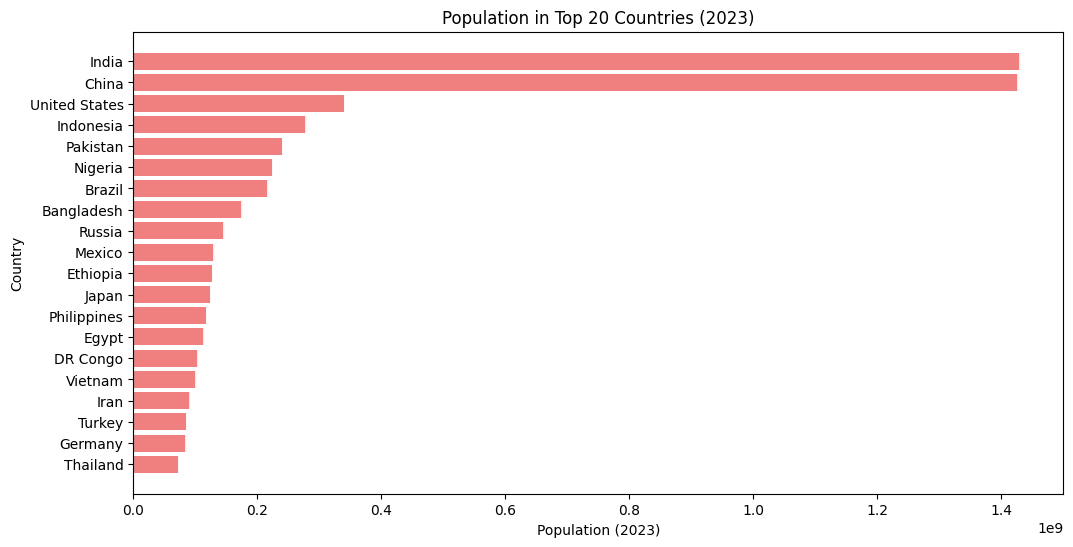

In [56]:
#GRAPHICAL REPRESENTATION OF POPULATION OF TOP 20 COUNTRIES
import matplotlib.pyplot as plt

# Select the top 20 countries
top_20_population = df.nlargest(20, 'Population (2023)')

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.barh(top_20_population['Country (or dependency)'], top_20_population['Population (2023)'], color='lightcoral')
plt.xlabel('Population (2023)')
plt.ylabel('Country')
plt.title('Population in Top 20 Countries (2023)')
plt.gca().invert_yaxis()  # Invert the y-axis to display the highest population at the top
plt.show()


In [17]:
#DESCRIPTIVE ANALYSIS OF YEARLY CHANGE IN POPULATION
#import matplotlib.pyplot as plt

# Check if "Yearly Change" column is already numeric
if not pd.api.types.is_numeric_dtype(df['Yearly Change']):
    # Clean and convert "Yearly Change" column to numeric
    df['Yearly Change'] = df['Yearly Change'].str.replace('%', '').astype(float)

# Calculate descriptive statistics
yearly_change_stats = df['Yearly Change'].describe()

# Display the descriptive statistics
print("Descriptive Statistics for Yearly Change:")
print(yearly_change_stats)


Descriptive Statistics for Yearly Change:
count    234.000000
mean       0.965470
std        1.242413
min       -7.450000
25%        0.222500
50%        0.805000
75%        1.685000
max        4.980000
Name: Yearly Change, dtype: float64


In [15]:
#DESCRIPTIVE ANALYSIS OF NET CHANGE IN POPULATION
# Clean and convert "Net Change" column to numeric
df['Net Change'] = df['Net Change'].str.replace(',', '').astype(float)

# Calculate descriptive statistics for "Net Change"
net_change_stats = df['Net Change'].describe()

# Display descriptive statistics
print("Descriptive Statistics for Net Change:")
print(net_change_stats)


Descriptive Statistics for Net Change:
count    2.340000e+02
mean     3.000230e+05
std      1.001815e+06
min     -2.957105e+06
25%      2.360000e+02
50%      2.860150e+04
75%      2.236855e+05
max      1.145449e+07
Name: Net Change, dtype: float64


In [18]:
#CORRELATION BETWEEN "NET CHANGE" AND "YEARLY CHANGE"
correlation = df['Net Change'].corr(df['Yearly Change'])

# Print the correlation coefficient
print(f"Correlation between Net Change and Yearly Change: {correlation:.2f}")


Correlation between Net Change and Yearly Change: 0.33


object
Mean Land Area: 555956.81 Km²
Median Land Area: 79720.00 Km²
Mode Land Area(s): [460.0]


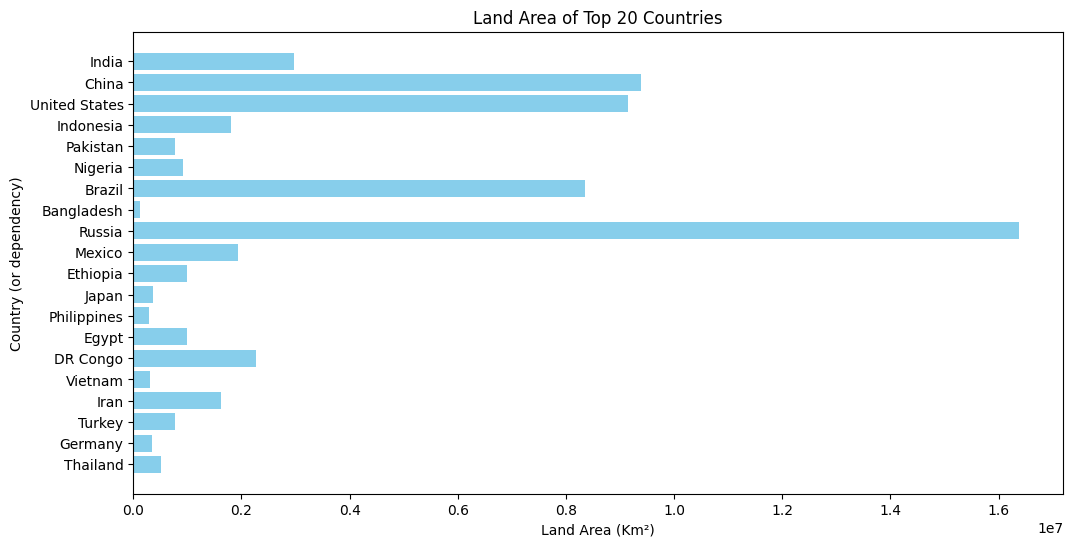

In [19]:
#DESCRIPTIVE ANALYIS OF LAND AREA AND THEIR GRAPHICAL REPRESENTATION OF TOP 20 COUNTRIES
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have the 'df' DataFrame

# 1. Check the data type of the "Land Area (Km²)" column
print(df['Land Area (Km²)'].dtype)

# 2. Convert the "Land Area (Km²)" column to a numerical format if needed
if df['Land Area (Km²)'].dtype == 'object':
    df['Land Area (Km²)'] = df['Land Area (Km²)'].str.replace(',', '').astype(float)

# 3. Calculate mean, median, and mode
mean_land_area = df['Land Area (Km²)'].mean()
median_land_area = df['Land Area (Km²)'].median()
mode_land_area = df['Land Area (Km²)'].mode().tolist()

# Display the summary statistics
print(f"Mean Land Area: {mean_land_area:.2f} Km²")
print(f"Median Land Area: {median_land_area:.2f} Km²")
print(f"Mode Land Area(s): {mode_land_area}")

# 4. Create a visual representation for the top 20 countries
top_20_df = df.head(20)

# Bar chart to visualize land area for the top 20 countries
plt.figure(figsize=(12, 6))
plt.barh(top_20_df['Country (or dependency)'], top_20_df['Land Area (Km²)'], color='skyblue')
plt.xlabel("Land Area (Km²)")
plt.ylabel("Country (or dependency)")
plt.title("Land Area of Top 20 Countries")
plt.gca().invert_yaxis()  # Reverse the order for better readability
plt.show()


object
Mean Density: 477.41 P/Km²
Median Density: 96.50 P/Km²
Mode Density(s): [4.0]


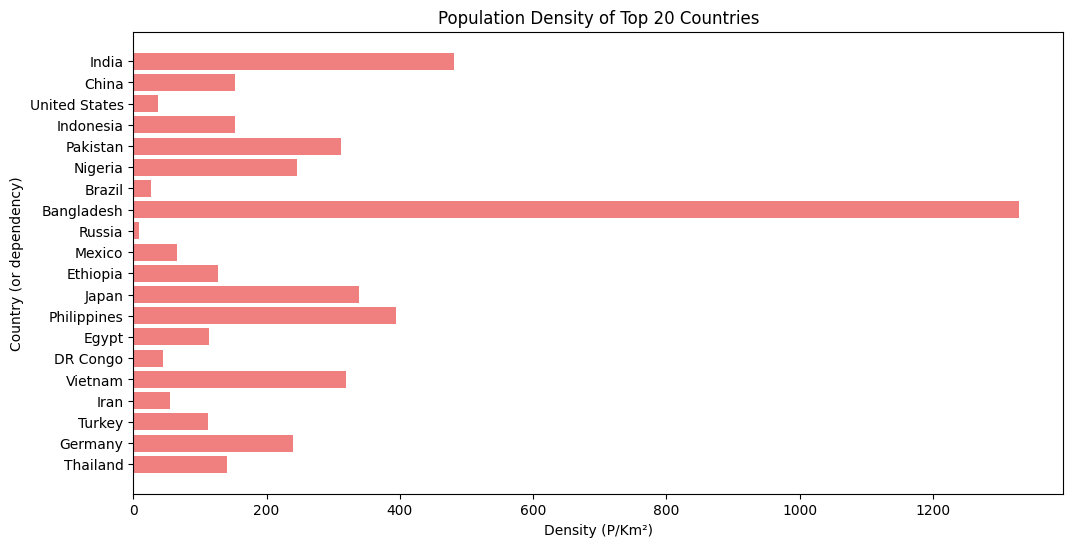

In [20]:
#DESCRIPTIVE ANALYSIS OF DENSITY AND THEIR GRAPHICAL REPRESENTATION OF TOP 20 COUNTRIES
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have the 'df' DataFrame

# 1. Check the data type of the "Density (P/Km²)" column
print(df['Density (P/Km²)'].dtype)

# 2. Convert the "Density (P/Km²)" column to a numerical format if needed
if df['Density (P/Km²)'].dtype == 'object':
    df['Density (P/Km²)'] = df['Density (P/Km²)'].str.replace(',', '').astype(float)

# 3. Calculate mean, median, and mode
mean_density = df['Density (P/Km²)'].mean()
median_density = df['Density (P/Km²)'].median()
mode_density = df['Density (P/Km²)'].mode().tolist()

# Display the summary statistics
print(f"Mean Density: {mean_density:.2f} P/Km²")
print(f"Median Density: {median_density:.2f} P/Km²")
print(f"Mode Density(s): {mode_density}")

# 4. Create a visual representation for the top 20 countries
top_20_df = df.head(20)

# Bar chart to visualize density for the top 20 countries
plt.figure(figsize=(12, 6))
plt.barh(top_20_df['Country (or dependency)'], top_20_df['Density (P/Km²)'], color='lightcoral')
plt.xlabel("Density (P/Km²)")
plt.ylabel("Country (or dependency)")
plt.title("Population Density of Top 20 Countries")
plt.gca().invert_yaxis()  # Reverse the order for better readability
plt.show()

In [21]:
# CORRELATION BETWEEN LAND AREA AND DENSITY
correlation = df['Density (P/Km²)'].corr(df['Land Area (Km²)'])

# Print the correlation coefficient
print(f"Correlation between Density and Land Area: {correlation:.2f}")



Correlation between Density and Land Area: -0.06


In [22]:
#COUNTRIES WITH HIGHEST AND LOWEST URBAN POPULATION
import numpy as np

# Replace 'N.A.' with NaN in the "Urban Pop %" column
df["Urban Pop %"] = df["Urban Pop %"].replace('N.A.', np.nan)

# Convert the "Urban Pop %" column to numeric (if not already)
df["Urban Pop %"] = df["Urban Pop %"].str.rstrip("%").astype(float)

# Find the country with the highest urban population percentage
highest_urban_population_country = df.loc[df["Urban Pop %"].idxmax()]["Country (or dependency)"]

# Find the highest urban population percentage value
highest_urban_population_value = df["Urban Pop %"].max()

# Find the country with the lowest urban population percentage
lowest_urban_population_country = df.loc[df["Urban Pop %"].idxmin()]["Country (or dependency)"]

# Find the lowest urban population percentage value
lowest_urban_population_value = df["Urban Pop %"].min()

# Print the results
print(f"Country with Highest Urban Population: {highest_urban_population_country} ({highest_urban_population_value}%)")
print(f"Country with Lowest Urban Population: {lowest_urban_population_country} ({lowest_urban_population_value}%)")


Country with Highest Urban Population: Belgium (99.0%)
Country with Lowest Urban Population: Saint Martin (0.0%)


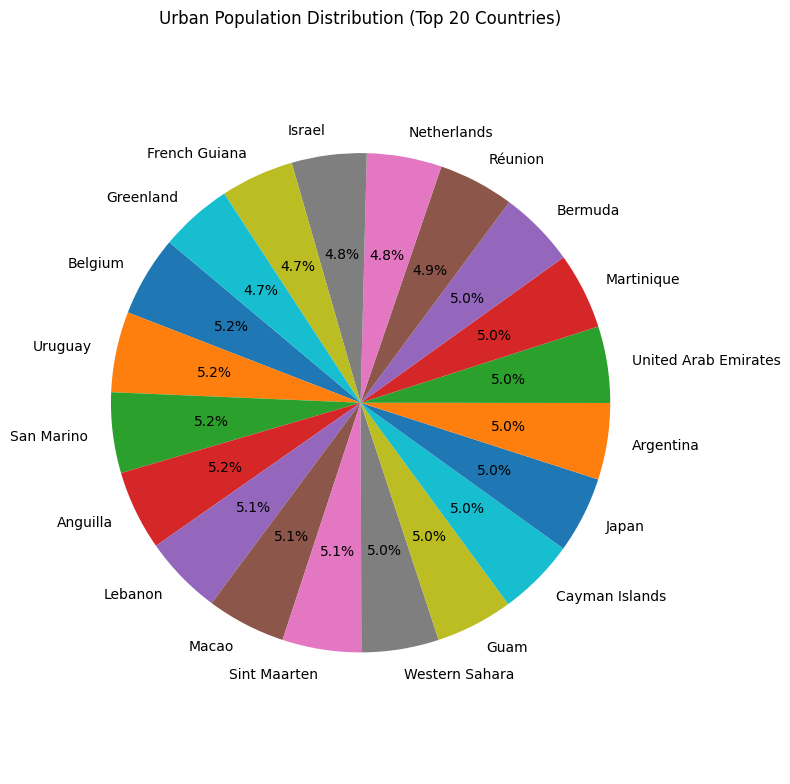

In [23]:
#GRAPHICAL REPRESENTATION OF URBAN POPULATION OF TOP 20 COUNTRIES
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  # Import numpy for handling NaN values

# Assuming you already have your DataFrame named "df"

# Replace non-numeric values with NaN in the "Urban Pop %" column
df['Urban Pop %'] = pd.to_numeric(df['Urban Pop %'], errors='coerce')

# Get the top 20 countries based on urban population percentage
top_20_urban = df.nlargest(20, 'Urban Pop %')

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_20_urban['Urban Pop %'], labels=top_20_urban['Country (or dependency)'], autopct='%1.1f%%', startangle=140)
plt.title('Urban Population Distribution (Top 20 Countries)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

In [45]:
#DESCRIPTIVE ANALYSIS OF LAND AREA
import pandas as pd

# Clean and convert the 'Land Area (Km²)' column to numeric (remove non-numeric characters)
df['Land Area (Km²)'] = pd.to_numeric(df['Land Area (Km²)'], errors='coerce')

# Calculate mean of the 'Land Area (Km²)' column
mean_land_area = df['Land Area (Km²)'].mean()
print(f"Mean Land Area (Km²): {mean_land_area:.2f}")

# Calculate median of the 'Land Area (Km²)' column
median_land_area = df['Land Area (Km²)'].median()
print(f"Median Land Area (Km²): {median_land_area:.2f}")

# Calculate mode of the 'Land Area (Km²)' column
mode_land_area = df['Land Area (Km²)'].mode().iloc[0]  # Mode can have multiple values, so we select the first one
print(f"Mode Land Area (Km²): {mode_land_area:.2f}")

# Find the country with the largest land area
largest_land_area_country = df[df['Land Area (Km²)'] == df['Land Area (Km²)'].max()]['Country (or dependency)'].values[0]
print(f"Largest Land Area Country: {largest_land_area_country}")

# Find the country with the lowest land area
lowest_land_area_country = df[df['Land Area (Km²)'] == df['Land Area (Km²)'].min()]['Country (or dependency)'].values[0]
print(f"Lowest Land Area Country: {lowest_land_area_country}")


Mean Land Area (Km²): 555956.81
Median Land Area (Km²): 79720.00
Mode Land Area (Km²): 460.00
Largest Land Area Country: Russia
Lowest Land Area Country: Holy See


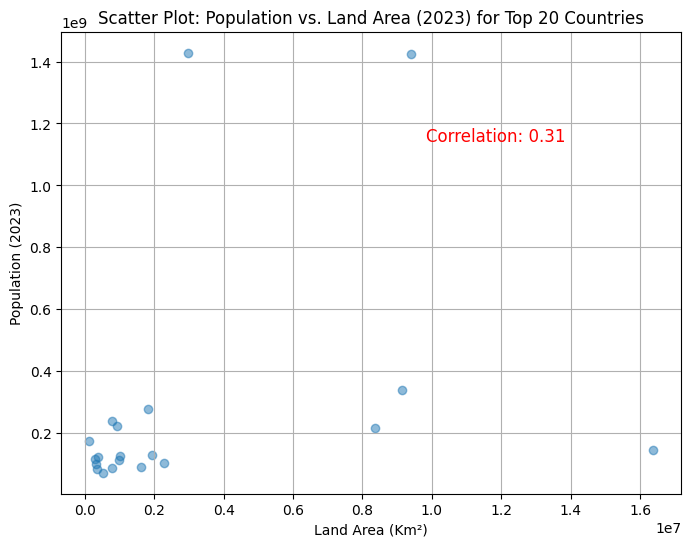

In [24]:
#CORRELATION AND GRAPHICAL REPRESENTATION OF LAND AREA AND POPULATION OF TOP 20 COUNTRIES
import pandas as pd
import matplotlib.pyplot as plt

# Select the top 20 countries with the highest population
top_20_countries = df.nlargest(20, "Population (2023)")

# Calculate the correlation for the top 20 countries
correlation_population_land_area = top_20_countries["Population (2023)"].corr(top_20_countries["Land Area (Km²)"])

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(top_20_countries["Land Area (Km²)"], top_20_countries["Population (2023)"], alpha=0.5)
plt.title("Scatter Plot: Population vs. Land Area (2023) for Top 20 Countries")
plt.xlabel("Land Area (Km²)")
plt.ylabel("Population (2023)")
plt.grid(True)

# Add correlation value to the plot
plt.text(
    top_20_countries["Land Area (Km²)"].max() * 0.6,
    top_20_countries["Population (2023)"].max() * 0.8,
    f"Correlation: {correlation_population_land_area:.2f}",
    fontsize=12,
    color="red",
)

plt.show()

In [41]:
#DESCRIPTIVE ANALYSIS OF FERTILITY RATE
import pandas as pd
import numpy as np  # Import numpy for handling NaN values

# Clean and convert the 'Fert. Rate' column to numeric (remove non-numeric characters)
df['Fert. Rate'] = pd.to_numeric(df['Fert. Rate'], errors='coerce')

# Calculate mean, median, and mode of the 'Fert. Rate' column
mean_fertility = df['Fert. Rate'].mean()
median_fertility = df['Fert. Rate'].median()
mode_fertility = df['Fert. Rate'].mode()

# Display the results
print(f"Mean Fertility Rate: {mean_fertility:.2f}")
print(f"Median Fertility Rate: {median_fertility:.2f}")
print(f"Mode Fertility Rate: {mode_fertility.iloc[0]:.2f}")





Mean Fertility Rate: 2.41
Median Fertility Rate: 2.00
Mode Fertility Rate: 1.60


In [44]:
#DESCRIPTIVE ANALYSIS OF MEDIAN AGE
import pandas as pd
# Clean and convert the 'Med. Age' column to numeric (remove non-numeric characters)
df['Med. Age'] = pd.to_numeric(df['Med. Age'], errors='coerce')

# Calculate mean of the 'Med. Age' column
mean_age = df['Med. Age'].mean()
print(f"Mean Median Age: {mean_age:.2f}")

# Calculate median of the 'Med. Age' column
median_age = df['Med. Age'].median()
print(f"Median Median Age: {median_age:.2f}")

# Calculate mode of the 'Med. Age' column
mode_age = df['Med. Age'].mode().iloc[0]  # Mode can have multiple values, so we select the first one
print(f"Mode Median Age: {mode_age:.2f}")


Mean Median Age: 31.31
Median Median Age: 32.00
Mode Median Age: 40.00


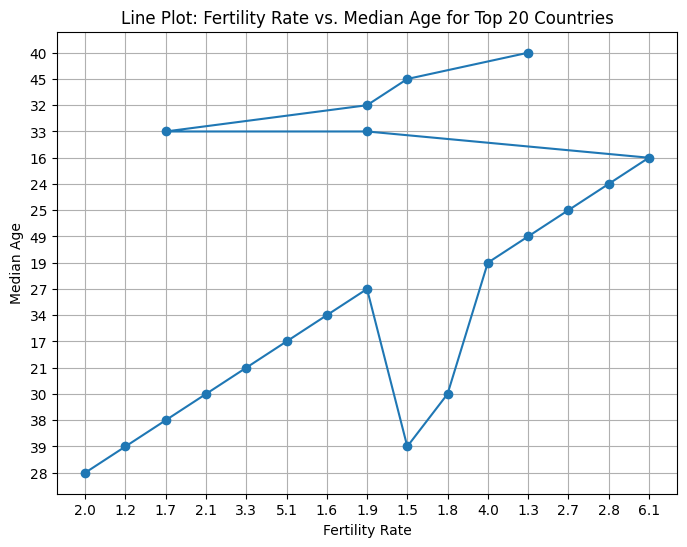

In [25]:
#CORRELATION BETWEEN FERTILITY RATE AND MEDIAN AGE OF TOP 20 COUNTRIES
import pandas as pd
import matplotlib.pyplot as plt

# Select the top 20 countries with the highest population (you can adjust this)
top_20_countries = df.nlargest(20, "Population (2023)")

# Create a line plot between Fertility Rate and Median Age for the top 20 countries
plt.figure(figsize=(8, 6))
plt.plot(top_20_countries["Fert. Rate"], top_20_countries["Med. Age"], marker='o', linestyle='-')
plt.title("Line Plot: Fertility Rate vs. Median Age for Top 20 Countries")
plt.xlabel("Fertility Rate")
plt.ylabel("Median Age")
plt.grid(True)
plt.show()



In [51]:
#DESCRIPTIVE STATS OF NET MIGRATION
import pandas as pd

# Assuming you have already loaded your dataset into a DataFrame named 'df'

# Clean and convert the 'Net Migration' column to numeric (remove commas)
df['Migrants (net)'] = pd.to_numeric(df['Migrants (net)'], errors='coerce')  # 'coerce' will turn non-numeric values into NaN

# Calculate descriptive statistics for 'Net Migration'
net_migration_stats = df['Migrants (net)'].describe()

# Display the descriptive statistics
print("Descriptive Statistics for Net Migration:")
print(net_migration_stats)


Descriptive Statistics for Net Migration:
count    2.340000e+02
mean     1.301282e+01
std      1.698334e+05
min     -9.104750e+05
25%     -9.776750e+03
50%     -5.000000e+02
75%      4.750000e+02
max      1.784718e+06
Name: Migrants (net), dtype: float64


In [53]:
#DESCRIPTIVE STATS OF URBAN POPULATION
import pandas as pd

# Assuming you have already loaded your dataset into a DataFrame named 'df'

# Check the data type of the 'Urban Pop %' column and convert it to string if needed
if not pd.api.types.is_string_dtype(df['Urban Pop %']):
    df['Urban Pop %'] = df['Urban Pop %'].astype(str)

# Clean and convert the 'Urban Pop %' column to numeric (remove '%' sign)
df['Urban Pop %'] = df['Urban Pop %'].str.rstrip('%')
df['Urban Pop %'] = pd.to_numeric(df['Urban Pop %'], errors='coerce')  # 'coerce' will turn non-numeric values into NaN

# Calculate descriptive statistics for 'Urban Pop %'
urban_population_stats = df['Urban Pop %'].describe()

# Display the descriptive statistics
print("Descriptive Statistics for Urban Population (%):")
print(urban_population_stats)


Descriptive Statistics for Urban Population (%):
count    216.000000
mean      59.550926
std       23.826450
min        0.000000
25%       40.750000
50%       61.500000
75%       79.250000
max       99.000000
Name: Urban Pop %, dtype: float64


Correlation between Net Migrants and Urban Population (%): 0.38


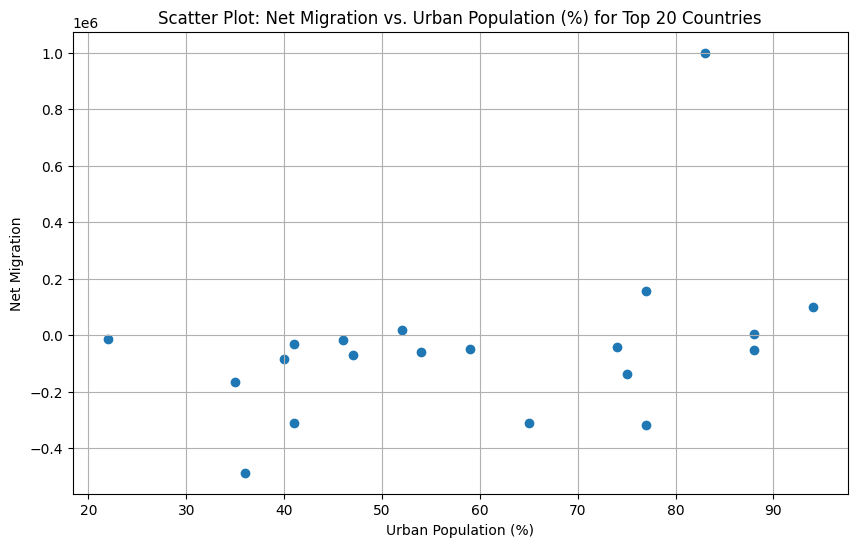

In [36]:
# CORRELATION BETWEEN MIGRATION(NET) AND URBAN POPULATION(&) OF TOP 20 COUNTRIES AND GRAPHICAL REPRESENTATION
correlation = top_20_countries["Migrants (net)"].corr(top_20_countries["Urban Pop %"])

print(f"Correlation between Net Migrants and Urban Population (%): {correlation:.2f}")
plt.figure(figsize=(10, 6))
plt.scatter(top_20_countries["Urban Pop %"], top_20_countries["Migrants (net)"])
plt.xlabel("Urban Population (%)")
plt.ylabel("Net Migration")
plt.title("Scatter Plot: Net Migration vs. Urban Population (%) for Top 20 Countries")
plt.grid(True)
plt.show()


In [48]:
#HIGHEST AND LOWEST WORLD SHARE WITH THEIR COUNTRY
# Clean and convert the 'World Share' column to numeric (remove '%' sign) and handle non-numeric values
df['World Share'] = df['World Share'].str.rstrip('%')
df['World Share'] = pd.to_numeric(df['World Share'], errors='coerce')  # 'coerce' will turn non-numeric values into NaN

# Find the country with the highest world share
highest_world_share_country = df.loc[df["World Share"].idxmax()]["Country (or dependency)"]

# Find the highest world share percentage value
highest_world_share_percentage = df["World Share"].max()

# Find the country with the lowest world share
lowest_world_share_country = df.loc[df["World Share"].idxmin()]["Country (or dependency)"]

# Find the lowest world share percentage value
lowest_world_share_percentage = df["World Share"].min()

# Display the results
print("Country with the Highest World Share:", highest_world_share_country)
print("Highest World Share Percentage:", highest_world_share_percentage)

print("Country with the Lowest World Share:", lowest_world_share_country)
print("Lowest World Share Percentage:", lowest_world_share_percentage)


Country with the Highest World Share: India
Highest World Share Percentage: 17.76
Country with the Lowest World Share: Guadeloupe
Lowest World Share Percentage: 0.0


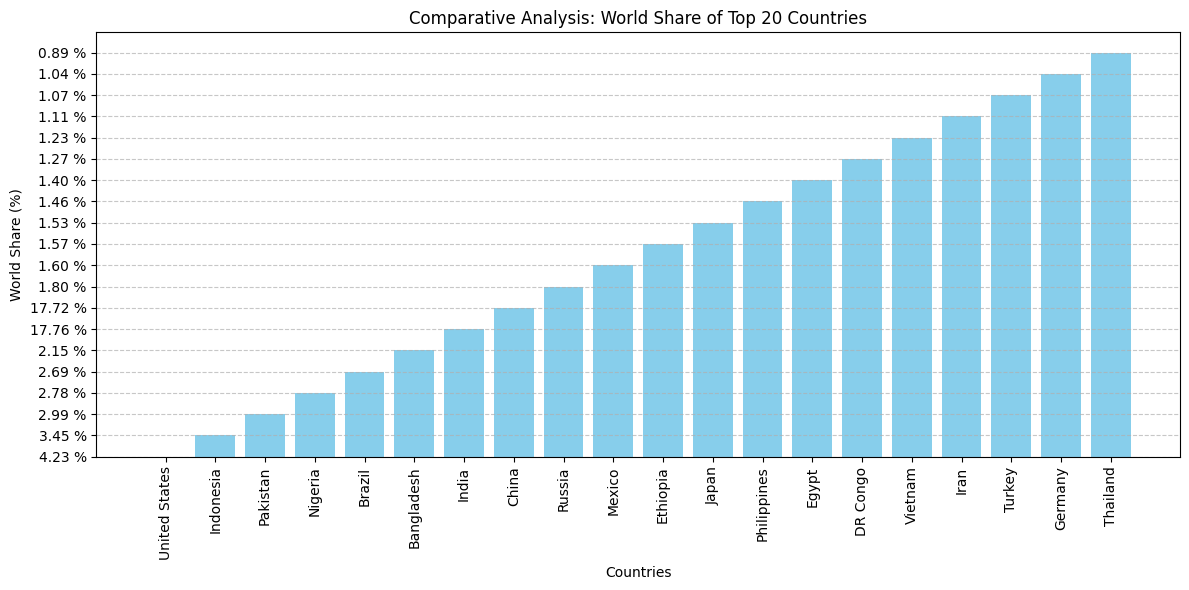

In [37]:
#COMPARATIVE ANALYSIS OF WORLD SHARE OF TOP 20 COUNTRIES
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have the DataFrame 'df' with the data

# Sort the DataFrame by "World Share" in descending order and select the top 20
top_20_countries = df.sort_values(by="World Share", ascending=False).head(20)

# Create a bar chart for World Share
plt.figure(figsize=(12, 6))
plt.bar(top_20_countries["Country (or dependency)"], top_20_countries["World Share"], color='skyblue')
plt.xlabel("Countries")
plt.ylabel("World Share (%)")
plt.title("Comparative Analysis: World Share of Top 20 Countries")
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()